# Spotify: All Time Top 2000s Mega Dataset
Conjunt de dades sobre cançons d'Spotify. L'objectiu és predir l'any de sortida d'una cançó a partir de les seves característiques.


In [12]:
import pandas as pd


""" A part de fer els split i replace per tractar amb les cançons que tenien comes al títol, 
    hem hagut de tractar manualment algunes longituds de cançons llargues que apareixien com
    a 1,413 segons enlloc de 1413 per exemple."""
numeric_variables = []
with open('dataset.txt', 'r') as file:
    for line in file:
        line = line.strip()
        line = line.replace('\'', '').replace('\\', '\'').replace('\'"', '"')

        data = line.split(',', 1)[1]
        n = data.count(',')
        data = data.replace(',', '', n - 13)
        data = data.split(',')
        numeric_variables.append(data)

df = pd.DataFrame(numeric_variables, columns=['Title', 'Artist', 'Genre', 'Year', 'BPM', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'])
df.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


Pasem les variables codificades com a _strings_ a númeriques.

In [13]:
for header in df.columns[3:10]:
    df[header] = df[header].astype(int)
for header in df.columns[11:]:
    df[header] = df[header].astype(int)
df['Length'] = df['Length'].astype(float)

## Descripció de les Dades

In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,1994,1959,Feeling Good,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artist,1994,731,Queen,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,1994,149,album rock,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,1994.0,NaN,NaN,NaN,1992.992979,16.116048,1956.0,1979.0,1993.0,2007.0,2019.0
BPM,1994.0,NaN,NaN,NaN,120.215647,28.028096,37.0,99.0,119.0,136.0,206.0
Energy,1994.0,NaN,NaN,NaN,59.679539,22.154322,3.0,42.0,61.0,78.0,100.0
Danceability,1994.0,NaN,NaN,NaN,53.238215,15.351507,10.0,43.0,53.0,64.0,96.0
Loudness,1994.0,NaN,NaN,NaN,-9.008526,3.647876,-27.0,-11.0,-8.0,-6.0,-2.0
Liveness,1994.0,NaN,NaN,NaN,19.012036,16.727378,2.0,9.0,12.0,23.0,99.0
Valence,1994.0,NaN,NaN,NaN,49.408726,24.858212,3.0,29.0,47.0,69.75,99.0


In [5]:
print(f"Tenim {len(df['Genre'].unique())} gèneres")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df['Genre'].value_counts())
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Tenim 149 gèneres
Genre
album rock                     413
adult standards                123
dutch pop                       88
alternative rock                86
dance pop                       83
dutch indie                     75
alternative metal               70
dance rock                      52
dutch cabaret                   51
classic rock                    51
modern rock                     49
glam rock                       49
pop                             47
art rock                        40
permanent wave                  38
british invasion                36
irish rock                      34
british soul                    31
europop                         27
classic uk pop                  22
disco                           18
dutch rock                      18
glam metal                      17
neo mellow                      17
alternative dance               15
blues rock                      15
art pop                         14
funk                           

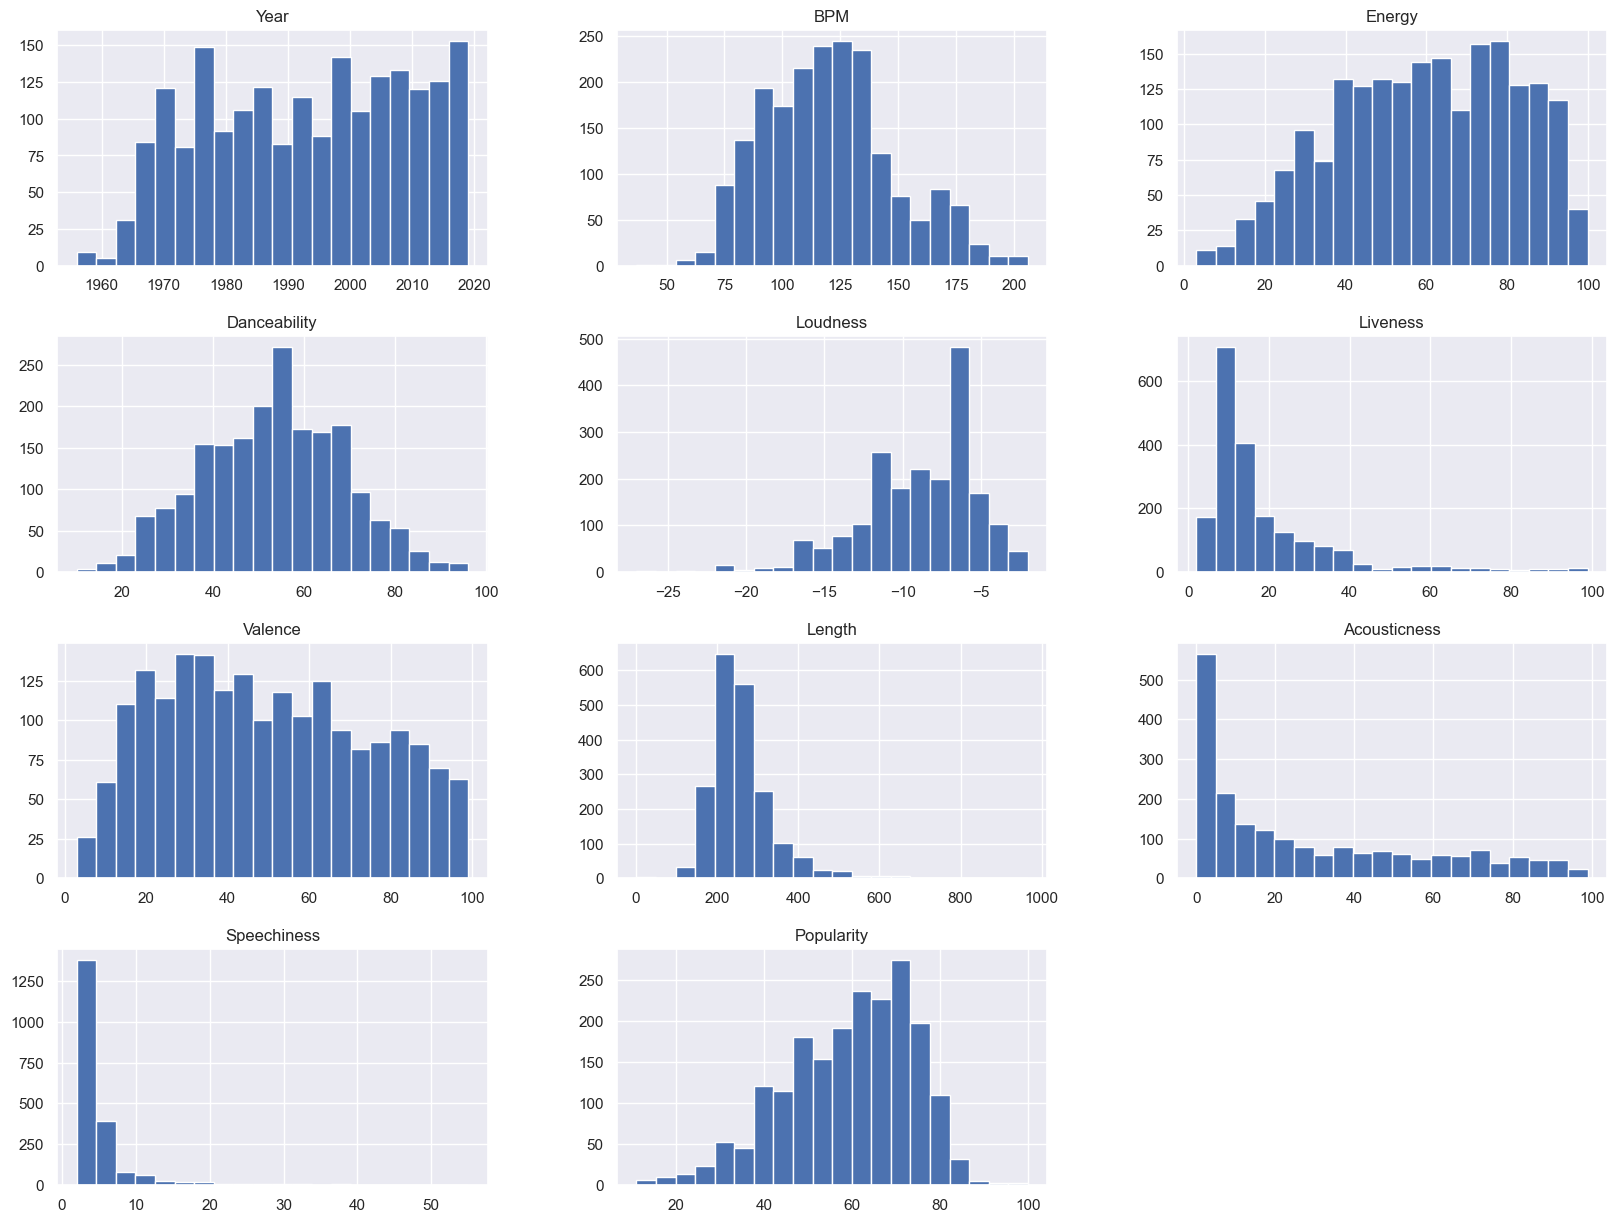

In [6]:
import seaborn as sns

sns.set()
df.hist(bins=20, figsize=(20,15));

In [7]:
from scipy.stats import normaltest


print("Checking normal distribution")
for idx, c in enumerate(df.columns):
    if df[c].dtype.kind == 'O':
        continue
    statistic, pvalue = normaltest(df[c])
    if pvalue < 0.05: print(c, " NO     p-value = ", pvalue)
    else: print(c, " SÍ     p-value = ", pvalue)    

Checking normal distribution
Year  NO     p-value =  0.0
BPM  NO     p-value =  6.634769049267775e-13
Energy  NO     p-value =  2.6034199840151527e-47
Danceability  NO     p-value =  0.0008296131997351538
Loudness  NO     p-value =  2.929041827482053e-45
Liveness  NO     p-value =  3.3667017149208617e-214
Valence  NO     p-value =  2.393390209428696e-126
Length  NO     p-value =  6.148529169461433e-213
Acousticness  NO     p-value =  2.359791528113908e-56
Speechiness  NO     p-value =  0.0
Popularity  NO     p-value =  2.9531536387882923e-19


La variable Danceability o Popularity podria haver-se considerat normal si mirem els plots, però després d'aplicar el test podem veure que no es pot asumir distribució normal per a cap variable.

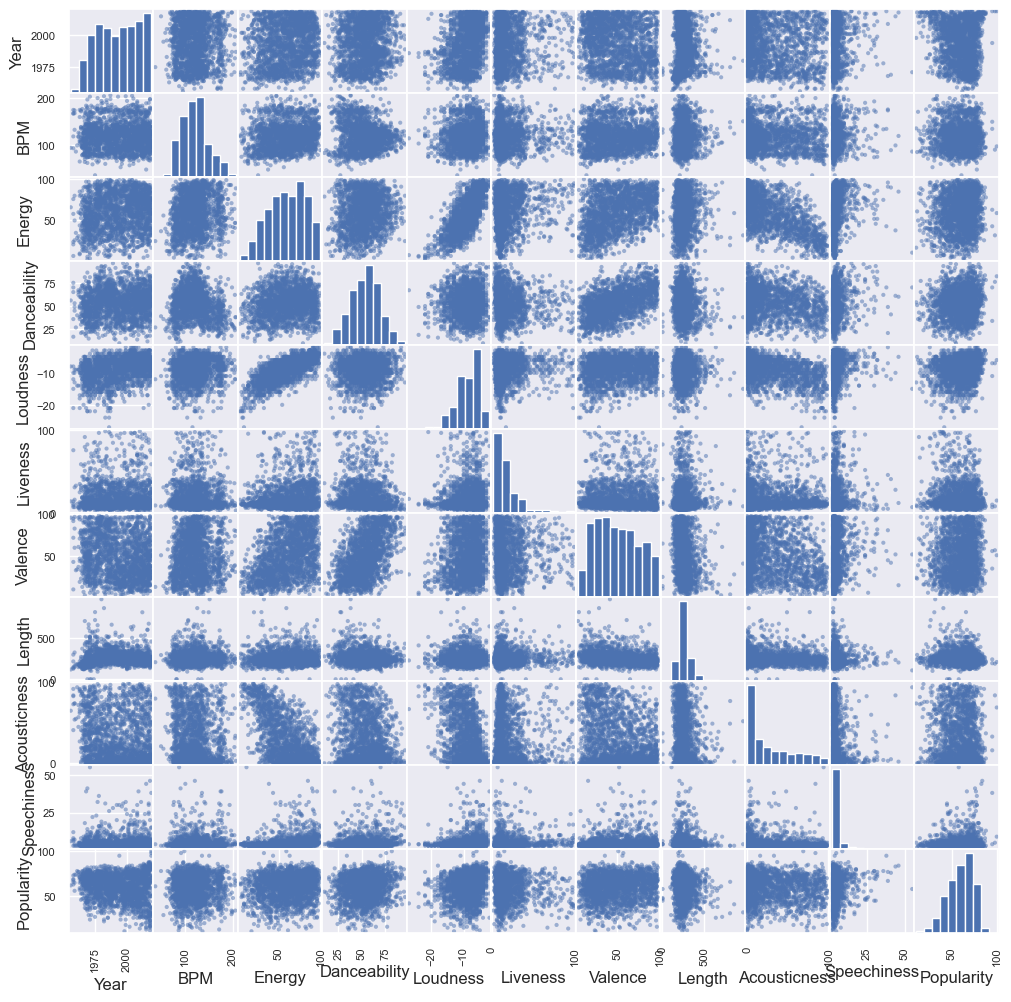

In [8]:
from pandas.plotting import scatter_matrix


scatter_matrix(df, figsize=(12,12));

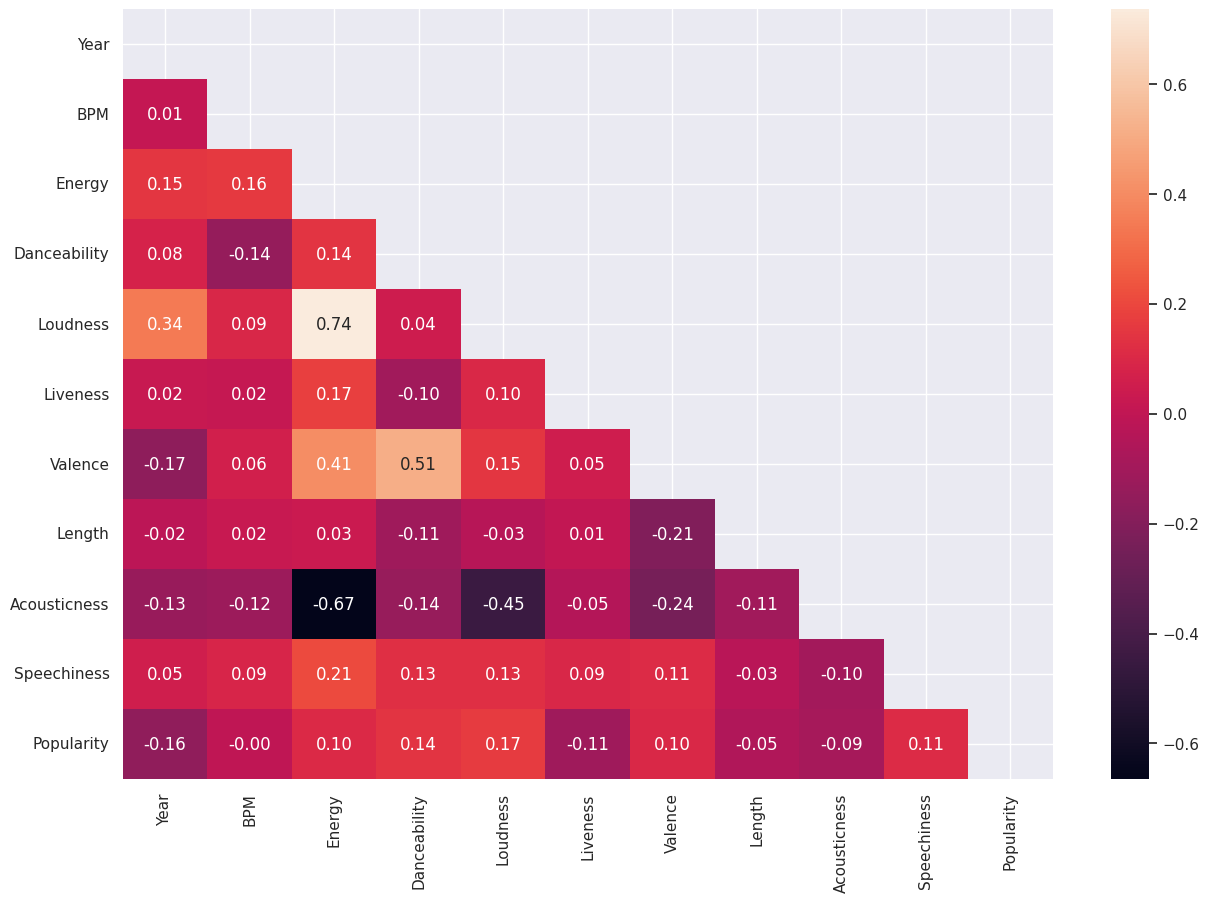

In [8]:
import matplotlib.pyplot as plt
import numpy as np


corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (15,10))
sns.heatmap(data = corr ,mask=mask, annot = True, fmt='.2f');

Veiem correlacions òbvies com que les cançons sorolloses tenen molta energia o que les acústiques en tenen poca. També com a curiositat veiem que com més recent és una cançó mes sorollosa sol ser. Per últim, veiem que no tenim gaire informació a la correlació amb la variable objectiu, amb valors que no superen 0.3 per cap variable.

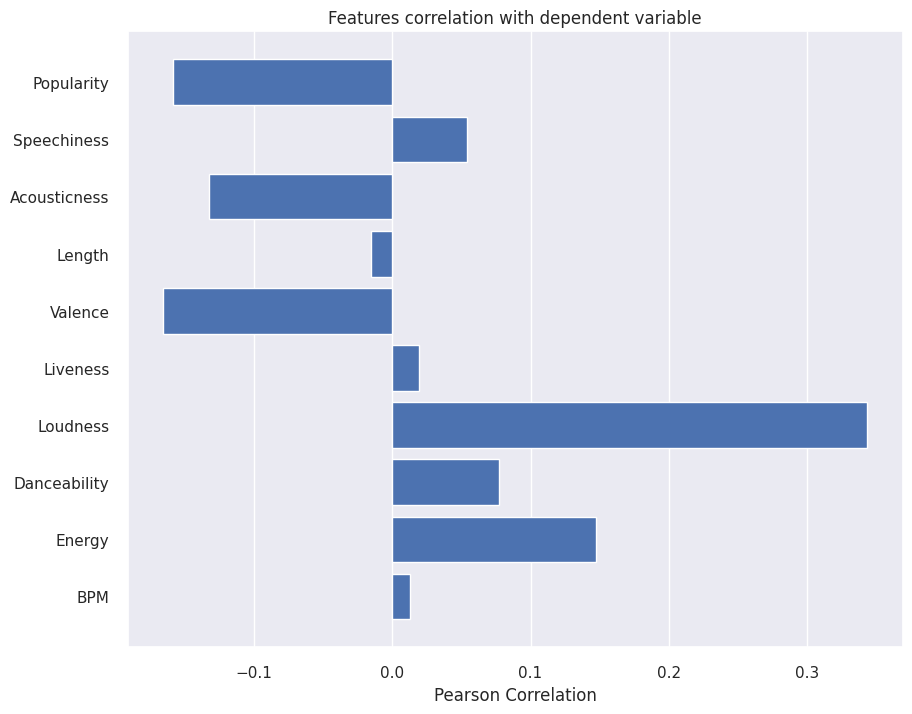

In [9]:
from yellowbrick.target.feature_correlation import feature_correlation


sns.set()
plt.figure(figsize=(10,8))
numeric_variables = df.drop(['Title', 'Artist', 'Genre', 'Year'], axis=1)
visualizer = feature_correlation(numeric_variables[numeric_variables.columns[:]], df["Year"], labels=list(numeric_variables[numeric_variables.columns[:]].columns), method='pearson');

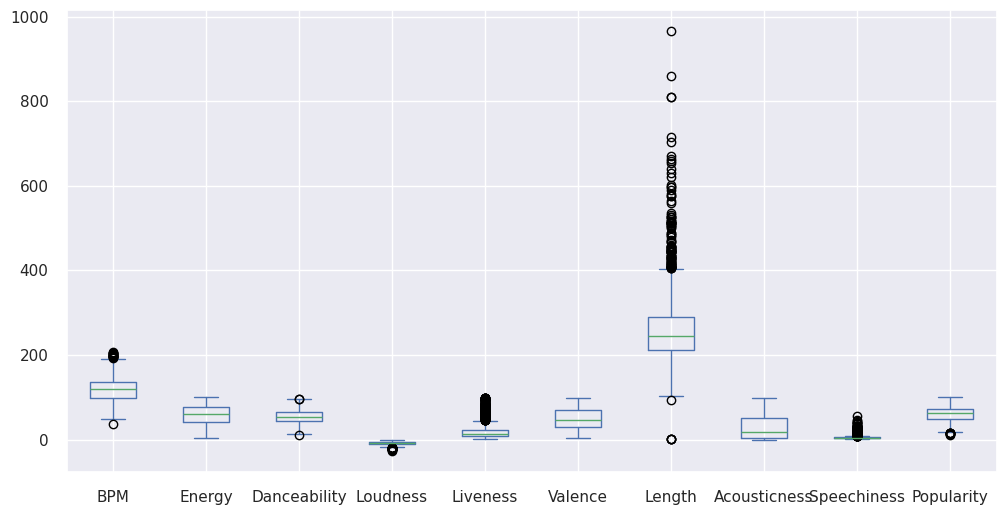

In [10]:
numeric_variables.plot.box(figsize=(12,6));

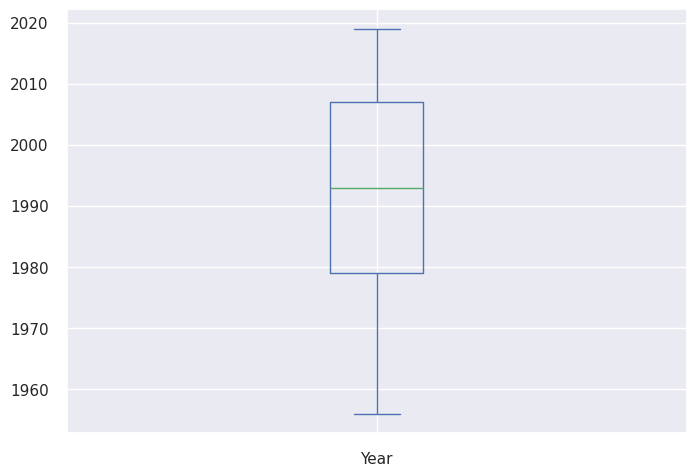

In [11]:
df['Year'].plot.box();

## Processament de les Dades

No tenim valors nuls.

In [9]:
df.isna().sum().sort_values(ascending=False)

Title           0
Artist          0
Genre           0
Year            0
BPM             0
Energy          0
Danceability    0
Loudness        0
Liveness        0
Valence         0
Length          0
Acousticness    0
Speechiness     0
Popularity      0
dtype: int64

De moment tractarem les dades sense el gènere.

In [10]:
df_no_genres = df.drop(columns=['Title', 'Artist', 'Genre'])
df_no_genres.head()

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,2004,157,30,53,-14,11,68,201.0,94,3,71
1,2000,135,79,50,-11,17,81,207.0,17,7,39
2,2001,168,69,66,-9,7,52,341.0,2,17,69
3,2007,173,96,43,-4,3,37,269.0,0,4,76
4,2002,106,82,58,-5,10,87,256.0,1,3,59


In [14]:
from sklearn.preprocessing import MinMaxScaler


def scaling_preprocessing(data, scaled_columns):
    data = data.__deepcopy__()
    data[scaled_columns] = MinMaxScaler().fit_transform(data[scaled_columns])
    return data

In [15]:
df_no_genres = scaling_preprocessing(data=df_no_genres, scaled_columns=['Popularity', 'BPM', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness'])
df_no_genres.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Year,1994.0,1992.992979,16.116048,1956.0,1979.000000,1993.000000,2007.000000,2019.0
BPM,1994.0,0.492400,0.165847,0.0,0.366864,0.485207,0.585799,1.0
Energy,1994.0,0.584325,0.228395,0.0,0.402062,0.597938,0.773196,1.0
Danceability,1994.0,0.502770,0.178506,0.0,0.383721,0.500000,0.627907,1.0
Loudness,1994.0,0.719659,0.145915,0.0,0.640000,0.760000,0.840000,1.0
Liveness,1994.0,0.175382,0.172447,0.0,0.072165,0.103093,0.216495,1.0
Valence,1994.0,0.483424,0.258940,0.0,0.270833,0.458333,0.695312,1.0
Length,1994.0,0.268138,0.084928,0.0,0.218555,0.252756,0.298358,1.0
Acousticness,1994.0,0.291496,0.293050,0.0,0.030303,0.181818,0.505051,1.0
Speechiness,1994.0,0.056509,0.083048,0.0,0.018868,0.037736,0.056604,1.0


In [18]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(df_no_genres.drop(columns=['Year']), df_no_genres['Year'], test_size=0.3, random_state=0)

## Models de Regressió Lineal

### Linear Regression
Un cop tenim les dades processades, provarem una regressió simple.

In [23]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


lr = LinearRegression().fit(x_train, y_train)
y_test_predicted_linear = lr.predict(x_test)
r2_lr_train = np.mean(cross_val_score(lr, x_train, y_train))
r2_lr_test = np.mean(cross_val_score(lr, x_test, y_test))

print(f'Train R2 score: {r2_lr_train}')
print(f'Test R2 score: {r2_lr_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_linear))))

Train R2 score: 0.2526358938728327
Test R2 score: 0.255677055527814
Mitjana d'anys d'error: 13.793337844953761


### RIDGE

In [24]:
from sklearn.linear_model import RidgeCV


lambdas = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 5, 10, 50, 100]

ridge_cv = RidgeCV(alphas=lambdas, cv=5).fit(x_train, y_train)
y_test_predicted_ridge = ridge_cv.predict(x_test)
r2_ridge_train = np.mean(cross_val_score(ridge_cv, x_train, y_train))
r2_ridge_test = np.mean(cross_val_score(ridge_cv, x_test, y_test))

print(f'Best lambda: {ridge_cv.alpha_}')
print(f'Train R2 score: {r2_ridge_train}')
print(f'Test R2 score: {r2_ridge_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_ridge))))

Best lambda: 0.5
Train R2 score: 0.25293782677110466
Test R2 score: 0.25709040462201094
Mitjana d'anys d'error: 13.79823917827421


### LASSO

In [25]:
from sklearn.linear_model import LassoCV


lasso_cv = LassoCV(alphas=lambdas, cv=5).fit(x_train, y_train)
y_test_predicted_lasso = lasso_cv.predict(x_test)
r2_lasso_train = np.mean(cross_val_score(lasso_cv, x_train, y_train))
r2_lasso_test = np.mean(cross_val_score(lasso_cv, x_test, y_test))

print(f'Best lambda: {ridge_cv.alpha_}')
print(f'Train R2 score: {r2_lasso_train}')
print(f'Test R2 score: {r2_lasso_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_lasso))))

Best lambda: 0.5
Train R2 score: 0.2524404304483543
Test R2 score: 0.25610179772632913
Mitjana d'anys d'error: 13.793538883905205


(Deprecated)
Durant el desenvolupament de la pràctica, una possibilitat es codificar la variable categòrica 'Genre' per poder-la incloure en el model de regressió. A més, donat que aquesta pot prendre molts valors, es podria agrupar aquells generes que no son tan freqüents en una nova categoria anomenada 'Others' o agrupar gèneres similars entre si (com tots els relacionats amb el rock, per exemple), tenint així menys valors possibles.
L'objectiu final de la pràctica és aconseguir un model de regressió que ens permeti predir l'any en que ha sortit una cançó, depenent de les seves característiques.

## -------------- SEPARACIO PER TREBALLAR AMB GENERES SI FOS NECESSARI --------------------

A continuació transformem les variables categòriques amb One-Hot encoding (això ho farem servir només en el cas que volguem incloure la variable Genre)

In [26]:
def encode_one_hot(dataframe):
    dataframe = dataframe.__deepcopy__()
    categoric_columns = [c for c in dataframe if dataframe[c].dtype.kind == 'O']

    for c in categoric_columns:
        dummies = pd.get_dummies(dataframe[c], drop_first=True, prefix=c, prefix_sep='_', dtype='int')

        dataframe = pd.concat([dataframe, dummies], axis=1)
        dataframe.drop(columns=[c], inplace=True)
    
    return dataframe

In [30]:
df_with_genres = df.drop(columns=['Title', 'Artist'])
df_with_genres = encode_one_hot(df_with_genres)
df_with_genres.head()

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,...,Genre_reggae,Genre_reggae fusion,Genre_rock-and-roll,Genre_scottish singer-songwriter,Genre_soft rock,Genre_stomp and holler,Genre_streektaal,Genre_trance,Genre_uk pop,Genre_yacht rock
0,2004,157,30,53,-14,11,68,201.0,94,3,...,0,0,0,0,0,0,0,0,0,0
1,2000,135,79,50,-11,17,81,207.0,17,7,...,0,0,0,0,0,0,0,0,0,0
2,2001,168,69,66,-9,7,52,341.0,2,17,...,0,0,0,0,0,0,0,0,0,0
3,2007,173,96,43,-4,3,37,269.0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2002,106,82,58,-5,10,87,256.0,1,3,...,0,0,0,0,0,0,0,0,0,0


### PCA

Veiem que aplicar reducció de dimensionalitat sobre les variables amb els gèneres segurament no ens doni millors resultats. Necessitem molts components per explicar una variança significativa.

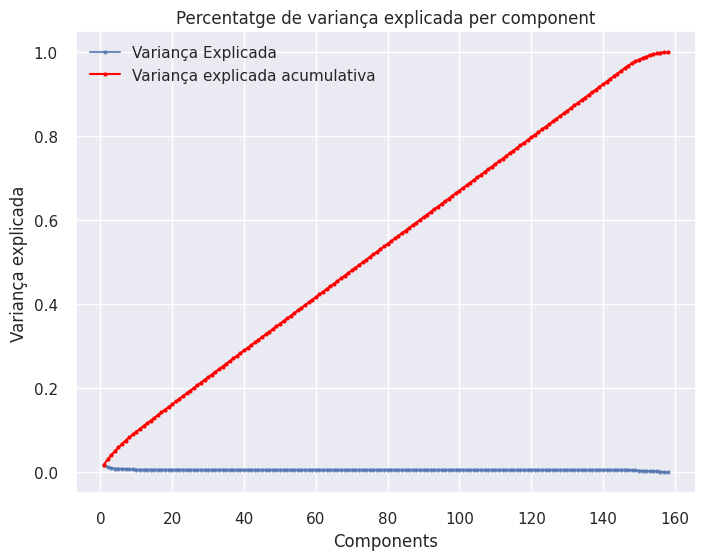

In [37]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler


data_columns = (df_with_genres.columns).drop('Year')
df_with_genres[data_columns] = StandardScaler().fit_transform(df_with_genres[data_columns])
pca = PCA().fit(df_with_genres[data_columns])

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variança Explicada");
y_label = plt.ylabel('Variança explicada');
x_label = plt.xlabel('Components');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variança explicada acumulativa");
plt.legend();
plt.title('Percentatge de variança explicada per component');